In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import scipy.integrate

C:\Users\jdavies\Anaconda3\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
class Rogowskis:
    def __init__(self, filename):
        data=np.genfromtxt(open(filename,"rb"),delimiter="\t", skip_footer=1, skip_header=1)
        self.time_raw=data[:,0]
        #rogowski signals 1 and 2
        self.r1_raw=data[:,5]
        self.r2_raw=data[:,6]
        self.truncate()
        self.zero()
        #copy so as not to alter raw data
        self.r1=np.copy(self.r1_trz)
        self.r2=np.copy(self.r2_trz)
    def truncate(self):
        #find the start of the current pulse with a  high threshold
        start=np.nonzero(abs(self.r1_raw)>0.4)[0][0]
        #back off a bit so we can see the zero signal
        self.start=start-100
        #reverse the array to find the end of the current pulse with a high threshold
        rev_r1=self.r1_raw[::-1]
        end=np.nonzero(abs(rev_r1)>0.4)[0][0]
        #back off a bit so we can see the zero signal
        end=end-100
        self.end=self.r1_raw.size-end #find the index in the non-reversed array
        self.time=self.time_raw[self.start:self.end]
        self.r1_tr=self.r1_raw[self.start:self.end]
        self.r2_tr=self.r2_raw[self.start:self.end]
    def zero(self):
        #use the means of the zero signal to find the correct offset
        self.r1_zero=np.mean(self.r1_raw[0:self.start])
        self.r2_zero=np.mean(self.r2_raw[0:self.start])
        self.r1_trz=self.r1_tr-self.r1_zero
        self.r2_trz=self.r2_tr-self.r2_zero
    def plot_raw(self):
        self.fig_raw, self.ax_raw=plt.subplots()
        self.plot_raw=self.ax_raw.plot(self.time_raw, self.r1_raw, self.time_raw, self.r2_raw)
    def plot_tr(self):
        self.fig_tr, self.ax_tr=plt.subplots()
        self.plot_tr=self.ax_tr.plot(self.time, self.r1_tr, self.time, self.r2_tr)
    def plot_trz(self):
        self.fig_trz, self.ax_trz=plt.subplots()
        self.plot_trz=self.ax_trz.plot(self.time, self.r1_trz, self.time, self.r2_trz)
    #smoothing seems unnecessary
    def smooth(self):
        self.r1=scipy.signal.savgol_filter(self.r1_trz, self.sm_win, self.sm_order)
        self.r2=scipy.signal.savgol_filter(self.r2_trz, self.sm_win, self.sm_order)
    def plot_smooth(self):
        self.fig_sm, self.ax_sm=plt.subplots()
        self.plot_sm=self.ax_sm.plot(self.time, self.r1, self.time, self.r2)
    def undo_smooth(self):
        #copy so as not to alter raw data
        self.r1=np.copy(self.r1_trz)
        self.r2=np.copy(self.r2_trz)
    def integrate(self):
        self.r1_I=scipy.integrate.cumtrapz(self.r1,self.time)
        self.r2_I=scipy.integrate.cumtrapz(self.r2,self.time)
        self.time_I=self.time[:-1]
    #invert one channel is necessary
    def invert_r1(self):
        self.r1_I=-self.r1_I
    def invert_r2(self):
        self.r2_I=-self.r2_I
    def calibration(self, return_posts=8, attenuation=100, calibration=3):
        #I=2*pi/(mu_0*h*ln(r2/r1))*integ_0^t V dtm,l 
        #MAGPIE rogs: r1=18, r2=24, h=5.8 mm
        #gives a coeff of 3e9, but recall our timebase is in nanoseconds so 3
        self.I_T=(self.r1_I+self.r2_I)*attenuation*calibration*return_posts/2
        self.r1_I*=attenuation*return_posts*calibration
        self.r2_I*=attenuation*return_posts*calibration
    def plot_I(self):
        self.fig_I, self.ax_I=plt.subplots()
        self.plot=self.ax_I.plot(self.time_I, self.r1_I/1e6, self.time_I, self.r2_I/1e6)
    def plot_I_T(self):
        self.fig_I, self.ax_I=plt.subplots()
        self.plot=self.ax_I.plot(self.time_I, self.I_T/1e6)
        
class Bdots:
    def __init__(self, filename):
        data=np.genfromtxt(open(filename,"rb"),delimiter="\t", skip_footer=1, skip_header=1)
        self.time_raw=data[:,0]
        #rogowski signals 1 and 2
        self.b1_raw=data[:,1]
        self.b2_raw=data[:,2]
        self.b3_raw=data[:,3]
        self.b4_raw=data[:,4]

        self.truncate()
        self.zero()
        #copy so as not to alter raw data
        self.b1=np.copy(self.b1_trz)
        self.b2=np.copy(self.b2_trz)
        self.b3=np.copy(self.b3_trz)
        self.b4=np.copy(self.b4_trz)
    def truncate(self):
        #find the start of the current pulse with a  high threshold
        start=np.nonzero(abs(self.b1_raw)>0.8)[0][0]
        #back off a bit so we can see the zero signal
        self.start=start-100
        #reverse the array to find the end of the current pulse with a high threshold
        rev_r1=self.b1_raw[::-1]
        end=np.nonzero(abs(rev_r1)>0.8)[0][0]
        #back off a bit so we can see the zero signal
        end=end-100
        self.end=self.b1_raw.size-end #find the index in the non-reversed array
        self.time=self.time_raw[self.start:self.end]
        self.b1_tr=self.b1_raw[self.start:self.end]
        self.b2_tr=self.b2_raw[self.start:self.end]
        self.b3_tr=self.b3_raw[self.start:self.end]
        self.b4_tr=self.b4_raw[self.start:self.end]
    def zero(self):
        #use the means of the zero signal to find the correct offset
        self.b1_zero=np.mean(self.b1_raw[0:self.start])
        self.b2_zero=np.mean(self.b2_raw[0:self.start])
        self.b1_trz=self.b1_tr-self.b1_zero
        self.b2_trz=self.b2_tr-self.b2_zero
        self.b3_zero=np.mean(self.b3_raw[0:self.start])
        self.b4_zero=np.mean(self.b4_raw[0:self.start])
        self.b3_trz=self.b3_tr-self.b1_zero
        self.b4_trz=self.b4_tr-self.b2_zero
    def plot_raw(self):
        self.fig_raw, self.ax_raw=plt.subplots()
        self.plot_raw=self.ax_raw.plot(self.time_raw, self.b1_raw, self.time_raw, self.b2_raw,
                                      self.time_raw, self.b3_raw, self.time_raw, self.b4_raw)
    def plot_tr(self):
        self.fig_tr, self.ax_tr=plt.subplots()
        self.plot_tr=self.ax_tr.plot(self.time, self.b1_tr, self.time, self.b2_tr,
                                     self.time, self.b3_tr, self.time, self.b4_tr)
    def plot_trz(self):
        self.fig_trz, self.ax_trz=plt.subplots()
        self.plot_trz=self.ax_trz.plot(self.time, self.b1_trz, self.time, self.b2_trz,
                                       self.time, self.b3_trz, self.time, self.b4_trz)
    def integrate(self):
        self.b1_B=scipy.integrate.cumtrapz(self.b1,self.time)
        self.b2_B=scipy.integrate.cumtrapz(self.b2,self.time)
        self.b3_B=scipy.integrate.cumtrapz(self.b3,self.time)
        self.b4_B=scipy.integrate.cumtrapz(self.b4,self.time)
        self.time_B=self.time[:-1]
    def plot_B(self):
        self.fig_B, self.ax_B=plt.subplots()
        self.plot=self.ax_B.plot(self.time_B, self.b1_B, self.time_B, self.b2_B,
                                self.time_B, self.b3_B, self.time_B, self.b4_B)


In [69]:
%cd 'C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s0513_15 RECONNECTION - Carbon repeat'
Rog0513=Rogowskis("s0513_15 rogs.dat") 
BD0513=Bdots("s0513_15 Bdots.dat")
Rog0513.integrate()
Rog0513.invert_r2()
Rog0513.calibration()
BD0513.integrate()

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s0513_15 RECONNECTION - Carbon repeat


<IPython.core.display.Javascript object>


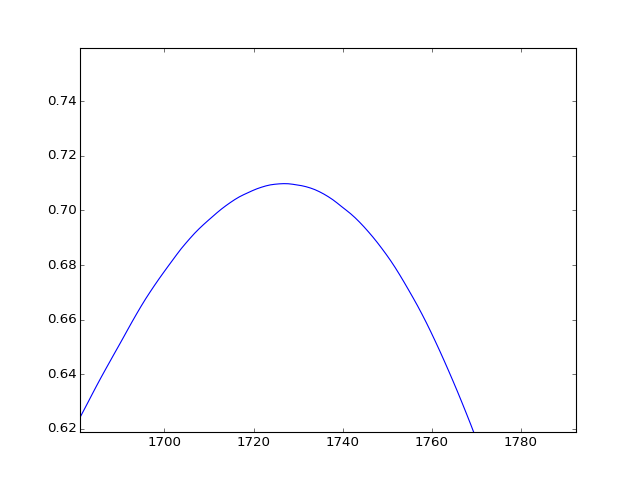

In [93]:
Rog0513.plot_I_T()

In [22]:
start_time=1511 #by eye
start_ind=np.nonzero(Rog.time_I>start_time)[0][0]
t=Rog.time_I[start_ind:]-start_time
I=Rog.I_T[start_ind:]

In [23]:
data=np.column_stack((t,I))
np.savetxt("s0513_15 current.csv", data, delimiter=",")

In [24]:
%cd 'C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s0611_15'
Rog2=Rogowskis("s0611_15 rogs.dat") 

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s0611_15


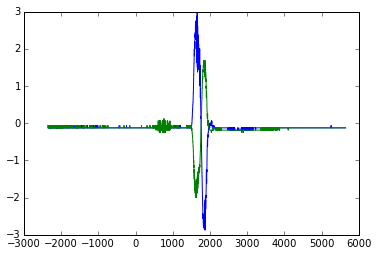

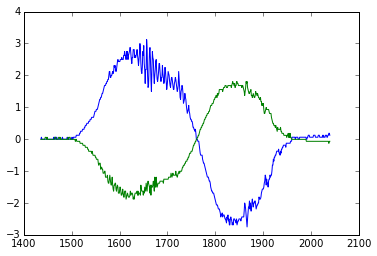

In [25]:
Rog2.plot_raw()
Rog2.plot_trz()

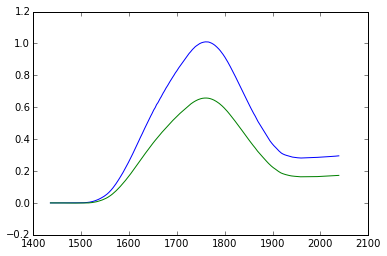

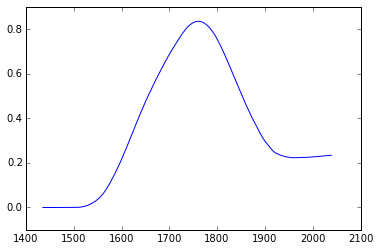

In [26]:
Rog2.integrate()
Rog2.invert_r2()
Rog2.calibration()
Rog2.plot_I()
Rog2.plot_I_T()

In [27]:
start_time=1508 #by eye
start_ind=np.nonzero(Rog.time_I>start_time)[0][0]
t=Rog.time_I[start_ind:]-start_time
I=Rog.I_T[start_ind:]

In [28]:
data=np.column_stack((t,I))
np.savetxt("s0611_15 current.csv", data, delimiter=",")

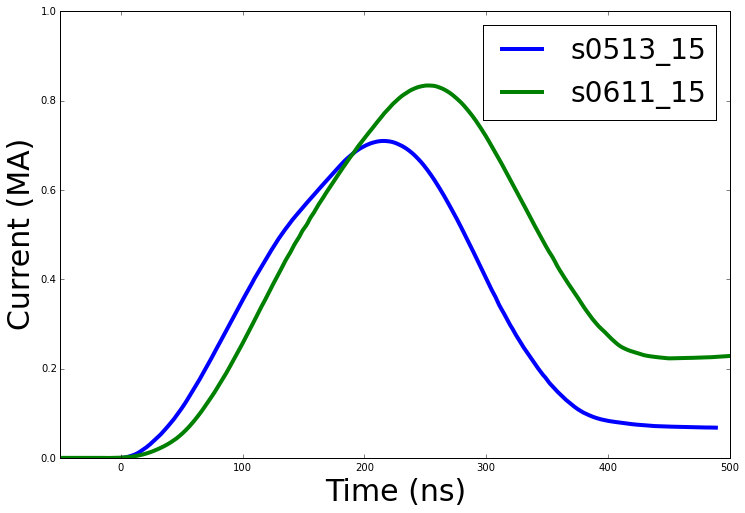

In [37]:
fig, ax=plt.subplots(figsize=(12,8))
ax.plot(Rog.time_I-1511, Rog.I_T/1e6, lw=4,label='s0513_15')
ax.plot(Rog2.time_I-1508, Rog2.I_T/1e6,lw=4,label='s0611_15')
ax.set_ylabel('Current (MA)', fontsize=30)
ax.set_xlabel('Time (ns)', fontsize=30)
ax.set_ylim(0,1.0)
ax.set_xlim(-50,500)
ax.legend(fontsize=28)

In [38]:
fig.savefig('Comparison of currents for s0513_15 and s0611_15.png')

In [77]:
%cd 'C:\Users\jdavies\Google Drive\MAGPIE\data\2014\s0930_14 Carbon TS (1.5)'
BDs2=Bdots("s0930_14 bdots.dat")
BDs2.integrate()

C:\Users\jdavies\Google Drive\MAGPIE\data\2014\s0930_14 Carbon TS (1.5)


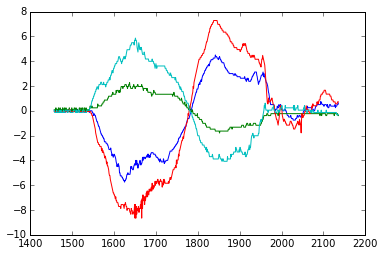

In [59]:
BDs2.plot_trz()

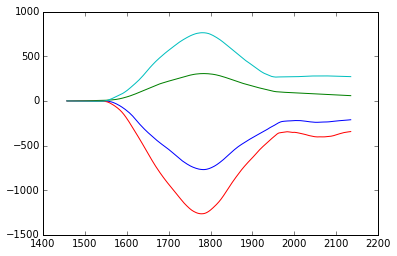

In [62]:
BDs2.integrate()
BDs2.plot_B()

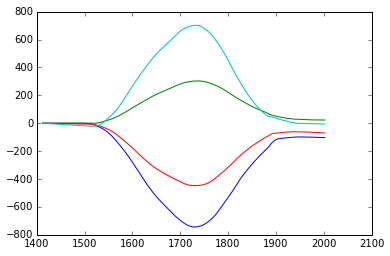

In [63]:
BDs.integrate()
BDs.plot_B()

In [94]:
%cd 'C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s1102_15 Al Bow Shock +TS'
Rog1102=Rogowskis("s1102_15 rogs.dat")
BDs1102=Bdots("s1102_15 bdots.dat")
Rog1102.integrate()
Rog1102.invert_r2()
Rog1102.calibration()
BDs1102.integrate()

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s1102_15 Al Bow Shock +TS


<IPython.core.display.Javascript object>


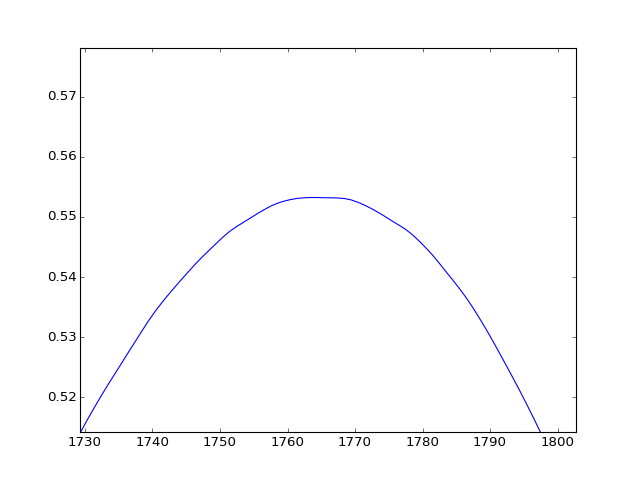

In [95]:
Rog1102.plot_I_T()

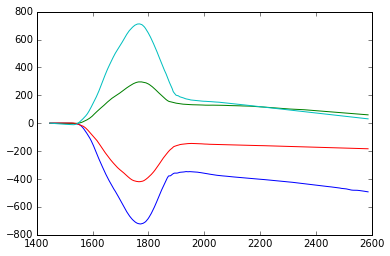

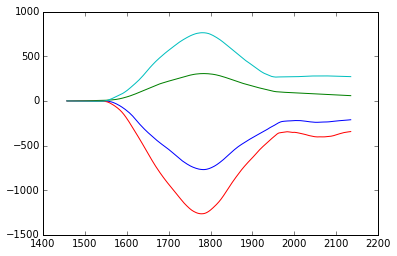

In [83]:
BDs3.plot_B()
BDs2.plot_B()

In [59]:
%cd 'C:\Users\jdavies\Google Drive\MAGPIE\data\Others'
RogOld=Rogowskis("s0823_11 rogs.dat") 
BDsOld=Bdots("s0823_11 bdots.dat")
RogOld.integrate()
RogOld.calibration(return_posts=4, calibration=4)
BDsOld.integrate()

C:\Users\jdavies\Google Drive\MAGPIE\data\Others


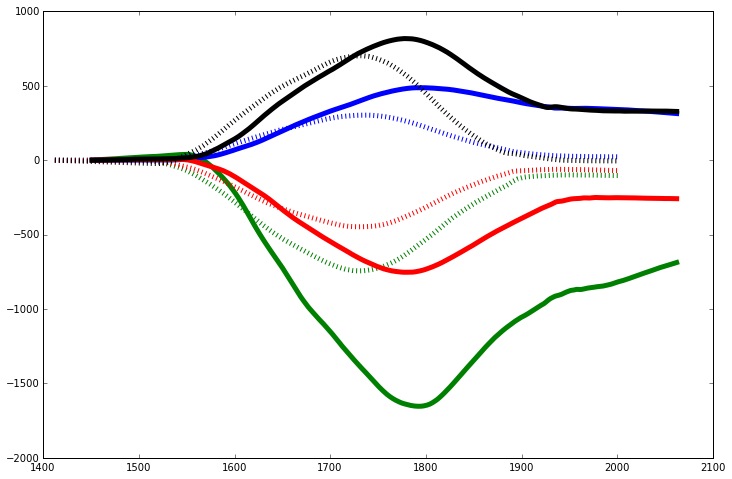

In [47]:
fig, ax=plt.subplots(figsize=(12,8))
ax.plot(BDs.time_B, BDs.b1_B, lw=5,color='green', ls=':',label='s0513_15')
ax.plot(BDsOld.time_B, BDsOld.b4_B, lw=5,color='green',label='s0823_13')
ax.plot(BDs.time_B, BDs.b2_B, lw=5,color='blue', ls=':',label='s0513_15')
ax.plot(BDsOld.time_B, BDsOld.b2_B, lw=5,color='blue',label='s0823_13')
ax.plot(BDs.time_B, BDs.b3_B, lw=5,color='r', ls=':',label='s0513_15')
ax.plot(BDsOld.time_B, BDsOld.b1_B, lw=5,color='r',label='s0823_13')
ax.plot(BDs.time_B, BDs.b4_B, lw=5,color='k', ls=':',label='s0513_15')
ax.plot(BDsOld.time_B, BDsOld.b3_B, lw=5,color='k',label='s0823_13')

In [48]:
fig.savefig('BDot comparison.png')

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s1026_15 Reconnection C TS Outflow 255ns


<IPython.core.display.Javascript object>


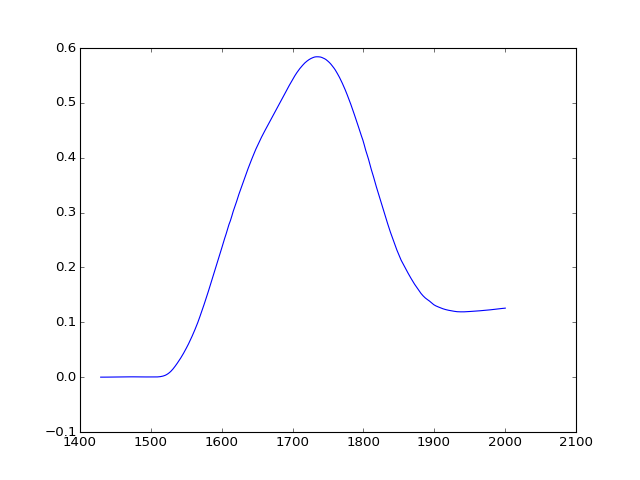

In [13]:
%cd "~\Google Drive\MAGPIE\data\2015\s1026_15 Reconnection C TS Outflow 255ns"
Rog5=Rogowskis("s1026_15 rogs.dat") 
Rog5.integrate()
Rog5.invert_r2()
Rog5.calibration()
Rog5.plot_I_T()

In [14]:
start_time=1508 #by eye
start_ind=np.nonzero(Rog5.time_I>start_time)[0][0]
t=Rog5.time_I[start_ind:]-start_time
I=Rog5.I_T[start_ind:]

In [15]:
data=np.column_stack((t,I))
np.savetxt("s1026_15 current.csv", data, delimiter=",")

C:\Users\jdavies\Google Drive\MAGPIE\data\Others


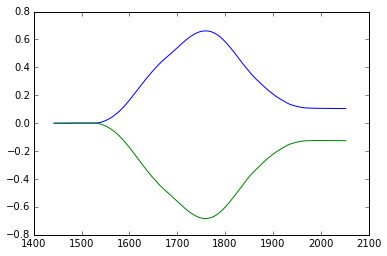

In [49]:
%cd 'C:\Users\jdavies\Google Drive\MAGPIE\data\Others'
Rog5=Rogowskis("s0904_15 rogs.dat") 
Rog5.integrate()
Rog5.calibration()
Rog5.plot_I()

C:\Users\jdavies\Google Drive\MAGPIE\data\Others


<IPython.core.display.Javascript object>


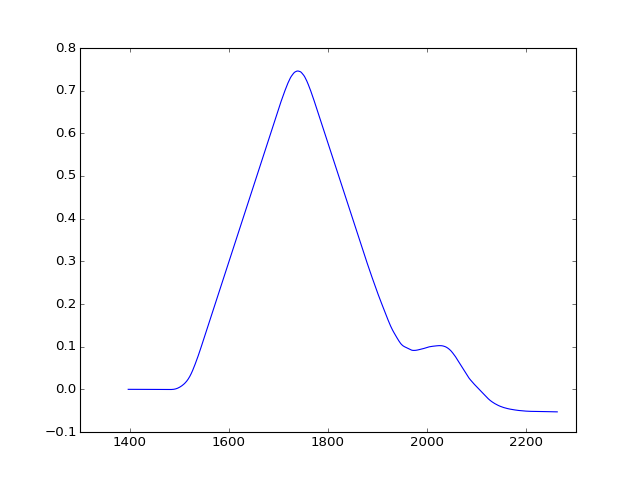

In [98]:
%cd 'C:\Users\jdavies\Google Drive\MAGPIE\data\Others'
Rog1127=Rogowskis("s1127_15 rogs.dat") 
Rog1127.integrate()
Rog1127.invert_r2()
Rog1127.calibration(return_posts=4)
Rog1127.plot_I_T()
BDs1127=Bdots("s1127_15 bdots.dat")
BDs1127.integrate()

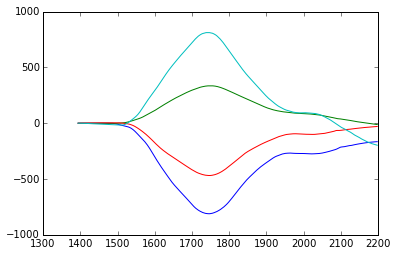

In [55]:
BDs1127.plot_B()

In [ ]:
fig, ax=plt.subplots(figsize=(12,8))
ax.plot(BDs1127.time_B, BDs1127.b1_B, lw=5,color='green', ls=':',label='s0513_15')
ax.plot(BDsOld.time_B, BDsOld.b4_B, lw=5,color='green',label='s0823_13')
ax.plot(BDs1127.time_B, BDs1127.b2_B, lw=5,color='blue', ls=':',label='s0513_15')
ax.plot(BDsOld.time_B, BDsOld.b2_B, lw=5,color='blue',label='s0823_13')
ax.plot(BDs1127.time_B, BDs1127.b3_B, lw=5,color='r', ls=':',label='s0513_15')
ax.plot(BDsOld.time_B, BDsOld.b1_B, lw=5,color='r',label='s0823_13')
ax.plot(BDs1127.time_B, BDs.b4_B, lw=5,color='k', ls=':',label='s0513_15')
ax.plot(BDsOld.time_B, BDsOld.b3_B, lw=5,color='k',label='s0823_13')

In [91]:
def Bdotcompare(BD1, BD2, current_start1=1500, current_start2=1500):
    t1=BD1.time_B-current_start1
    t2=BD2.time_B-current_start2
    fig, ax=plt.subplots(figsize=(12,8))
    ax.plot(t1, BD1.b1_B, lw=5,color='green', ls=':',label='B-dots 1')
    ax.plot(t2, BD2.b1_B, lw=5,color='green',label='B-dots 2')
    ax.plot(t1, BD1.b2_B, lw=5,color='blue', ls=':')
    ax.plot(t2, BD2.b2_B, lw=5,color='blue')
    ax.plot(t1, BD1.b3_B, lw=5,color='r', ls=':')
    ax.plot(t2, BD2.b3_B, lw=5,color='r')
    ax.plot(t1, BD1.b4_B, lw=5,color='k', ls=':')
    ax.plot(t2, BD2.b4_B, lw=5,color='k')
    ax.set_xlim([-50,600])
    ax.legend()
    

<IPython.core.display.Javascript object>


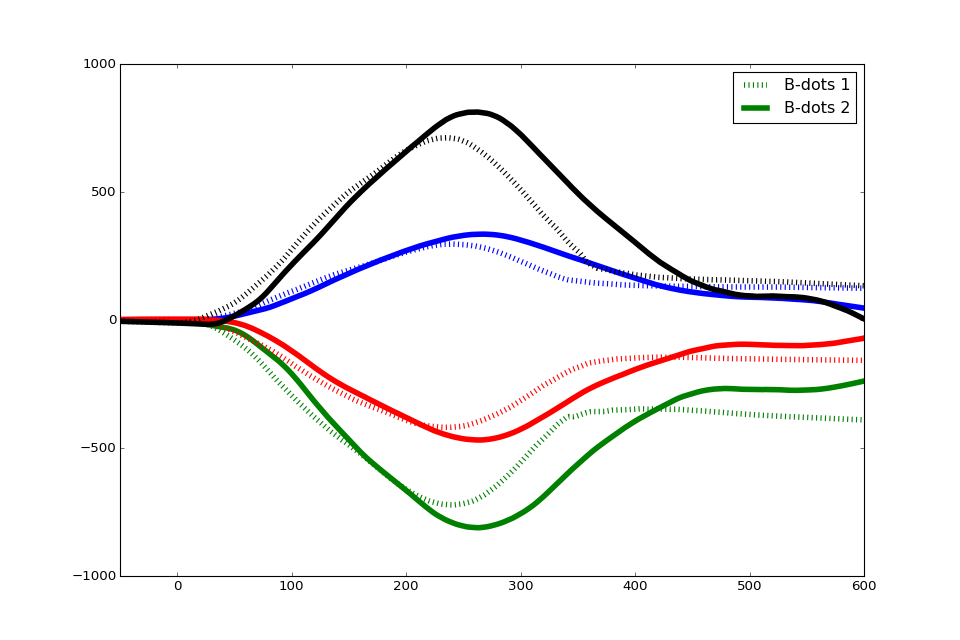

In [92]:
Bdotcompare(BDs1102, BDs1127, current_start1=1531, current_start2=1483)

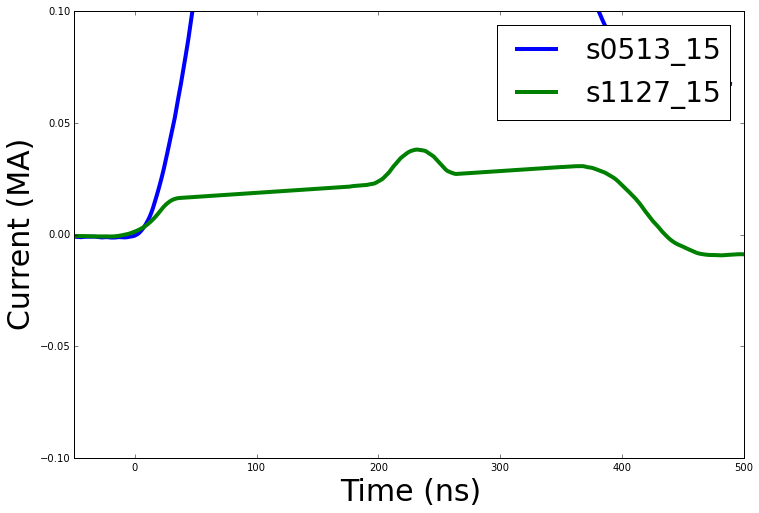

In [75]:
fig, ax=plt.subplots(figsize=(12,8))
ax.plot(Rog0513.time_I-1511, Rog0513.I_T/1e6, lw=4,label='s0513_15')
ax.plot(Rog1127.time_I-1508, Rog1127.I_T/1e6,lw=4,label='s1127_15')
ax.set_ylabel('Current (MA)', fontsize=30)
ax.set_xlabel('Time (ns)', fontsize=30)
ax.set_ylim(-0.1,0.1)
ax.set_xlim(-50,500)
ax.legend(fontsize=28)

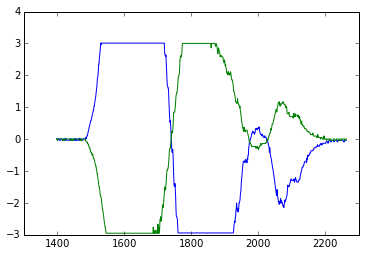

In [73]:
Rog1127.plot_trz()